# Numerical analysis of ergodicity of 1D potentials thermostatted using the DD algorithm

In [1]:
using ODE
include("../src/lyapunov.jl")



Use "(p::Poly)(...)" instead.


gramschmidt (generic function with 1 method)

### Potential and thermostat

In [2]:
potential(x) = x^2/2.
reservoir = "Logistic";

### Parameters

In [3]:
T = 10.0
beta = 1./T
Q = 2.0  #Thermostat "mass"
thermo = thermostat(reservoir, Q, beta)

ThermostatModel.Logistic{Float64}(2.0,10.0)

## Lyapunov spectrum

### Burn-in period

In [4]:
r = zeros(12)
r[1:3] = initcond(beta, Q) #Initial condition taken from the assumed equilibrium distribution
r[4] = r[8] = r[12] = 1.0  #Entries of the identity matrix in the initial condition
burn_intime = 2.0
deltat = 0.02

r1 = flow(variationalDDfield, r, deltat,burn_intime, potential, thermo)  #New initial condition after a transient time
r1[4:end] = [1.,0.,0.,0.,1.,0.,0.,0.,1.] #Entries of the identity matrix in the new initial condition;

### Simulation to calculate lyapunov exponents

In [5]:
nsteps = 100
deltatsampling = 0.1
deltat = 0.02
r, norm1, norm2, norm3, exp1, exp2, exp3 = lyapunovspectra(variationalDDfield,r1,deltat, deltatsampling,nsteps, potential, thermo)


Exponentes de Lyapunov: 0.3357667500729914, -0.05156648946540561, -0.3842002599900924


([-2.3677,1.66527,93.9187,-0.0184251,-0.619751,0.784582,0.0112798,-0.784794,-0.619654,0.999767,-0.00256728,0.0214506],[0.999986,1.00041,1.00444,1.01974,1.05662,1.11779,1.18549,1.23245,1.24871,1.24252  …  1.00158,1.00082,1.0003,1.00003,1.00002,1.00026,1.00074,1.00142,1.00226,1.00324],[0.995879,1.02972,1.09745,1.16246,1.17078,1.11674,1.04215,0.98476,0.953305,0.940444  …  0.990647,0.990302,0.990092,0.990045,0.990189,0.990542,0.991112,0.99189,0.992851,0.993948],[0.994161,0.961082,0.898146,0.835198,0.800318,0.793131,0.801359,0.81575,0.831692,0.84727  …  0.99782,0.998928,0.99966,0.999972,0.999836,0.999239,0.998193,0.996733,0.994925,0.992859],0.335767,-0.0515665,-0.3842)

## Trajectory (should be displayed as a Poincaré map)

In [8]:
function DDreduced(t::Float64, r::Vector{Float64})
    DDfield(r, potential, thermo)
end

DDreduced (generic function with 1 method)

In [11]:
using PyPlot

In [23]:
t = 0:0.02:20000.0
r = zeros(12)
r[1:3] = initcond(beta, Q) #Initial condition taken from the assumed equilibrium distribution
(t, pos) = ode45(DDreduced, r[1:3], t, points = :specified)
x = map(v -> v[1], pos)
y = map(v -> v[2], pos)
z = map(v -> v[3], pos);

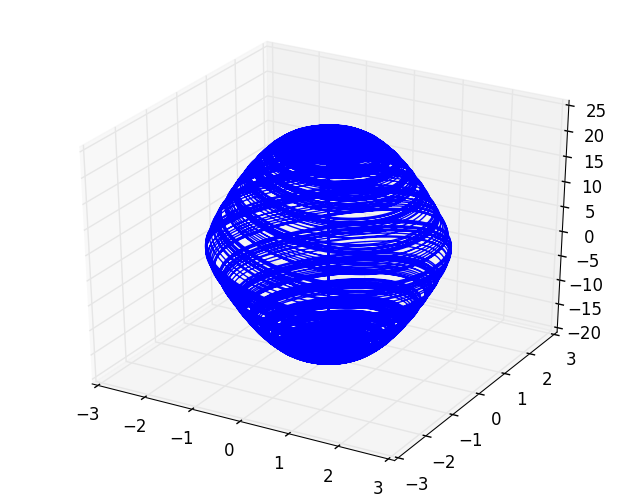

1-element Array{Any,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x7f3f5c4e3dd0>

In [24]:
plot3D(x,y,z)